## Data structure diagnostics

Sam Maurer, August 2015

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os; os.chdir('..')
import models
import datasources
import orca

/Users/smmaurer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
# Certain columns don't show up (or are not populated) until particular models are run

In [3]:
%%capture
orca.run(['neighborhood_vars'])

In [4]:
%%capture
orca.run(['rsh_simulate', 'rrh_simulate'])

In [5]:
%%capture
orca.run(['price_vars'])

## List tables and columns

In [6]:
orca.list_tables()

['zones',
 'buildings',
 'residential_units',
 'jobs',
 'zoning_np',
 'household_controls',
 'craigslist',
 'parcels_geography',
 'development_projects',
 'households',
 'costar',
 'household_extras',
 'homesales',
 'zoning_lookup',
 'employment_controls',
 'logsums',
 'nodes',
 'zoning_baseline',
 'parcels']

In [7]:
# List columns within each table, both those coded in the table definition
# and those registered separately

for t in orca.list_tables():
    print t.upper()
    print "\nfrom table definition:"
    try:
        print orca.get_table(t).local_columns
    except Exception, e:
        print e
    print "\nregistered separately:"
    print [p[1] for p in orca.list_columns() if p[0]==t]
    print

ZONES

from table definition:
['gid', 'tract', 'area', 'acres']

registered separately:
[]

BUILDINGS

from table definition:
['parcel_id', 'residential_units', 'residential_sqft', 'non_residential_sqft', 'building_sqft', 'stories', 'year_built', 'redfin_sale_year', 'building_type_id', 'residential_price', 'non_residential_price']

registered separately:
['sqft_per_unit', 'node_id', 'base_price_per_sqft', 'residential_price', 'vacant_residential_units', 'residential_rent', 'general_type', 'vacant_job_spaces', 'sqft_per_job', 'lot_size_per_unit', 'job_spaces', 'zone_id']

RESIDENTIAL_UNITS

from table definition:
['building_id', 'deed_restricted', 'num_units', 'unit_num', 'unit_residential_price', 'unit_residential_rent', 'unit_tenure']

registered separately:
['zone_id', 'submarket_id', 'unit_annual_rent', 'vacant_units', 'node_id']

JOBS

from table definition:
['sector_id', 'taz', 'building_id']

registered separately:
['empsix', 'node_id', 'zone_id', 'naics', 'empsix_id']

ZONING_NP

## List models, injectables, broadcasts

In [8]:
orca.list_steps()

['households_transition',
 'simple_jobs_transition',
 'hlcm_owner_simulate',
 'hlcm_li_simulate',
 'calc_prop_taxes',
 'feasibility',
 'rrh_simulate',
 'hlcm_estimate',
 'jobs_relocation',
 'price_vars',
 'residential_developer',
 'households_relocation',
 'rsh_simulate',
 'households_relocation_filtered',
 'price_to_rent_precompute',
 'scheduled_development_events',
 'jobs_transition',
 'hlcm_owner_estimate',
 'nrh_estimate',
 'nrh_simulate',
 'hlcm_renter_estimate',
 'simple_households_transition',
 'neighborhood_vars',
 'rrh_estimate',
 'hlcm_simulate',
 'hlcm_renter_simulate',
 'non_residential_developer',
 'travel_model_output',
 'subsidized_residential_developer',
 'elcm_simulate',
 'elcm_estimate',
 'rsh_estimate',
 'diagnostic_output']

In [9]:
orca.list_injectables()

['parcel_is_allowed_func',
 'unit_aggregations',
 'year',
 'iter_var',
 'building_type_map',
 'uuid',
 'aggregations',
 'parcel_sales_price_sqft_func',
 'form_to_btype_func',
 'supply_and_demand_multiplier_func',
 'net',
 'store',
 'add_extra_columns_func',
 'scenario_inputs',
 'coffer',
 'acct_settings',
 'run_number',
 'scenario',
 'settings',
 'parcel_average_price',
 'summary',
 'building_sqft_per_job']

In [10]:
orca.list_broadcasts()

[('logsums', 'parcels'),
 ('parcels_geography', 'buildings'),
 ('buildings', 'households'),
 ('nodes', 'parcels'),
 ('nodes', 'homesales'),
 ('nodes', 'buildings'),
 ('parcels', 'buildings'),
 ('logsums', 'costar'),
 ('nodes', 'craigslist'),
 ('households', 'household_extras'),
 ('logsums', 'buildings'),
 ('buildings', 'residential_units'),
 ('nodes', 'costar'),
 ('logsums', 'homesales'),
 ('buildings', 'jobs'),
 ('logsums', 'craigslist')]

## Dig into particular data series as needed

In [8]:
hh = sim.get_table('households').to_frame()

In [15]:
len(hh)

2732722

In [11]:
print hh[['white','black','asian','hisp']].describe()

                white           black           asian            hisp
count  2608019.000000  2608019.000000  2608019.000000  2608019.000000
mean         0.686555        0.080798        0.174240        0.129447
std          0.463894        0.272524        0.379315        0.335694
min          0.000000        0.000000        0.000000        0.000000
25%          0.000000        0.000000        0.000000        0.000000
50%          1.000000        0.000000        0.000000        0.000000
75%          1.000000        0.000000        0.000000        0.000000
max          1.000000        1.000000        1.000000        1.000000


In [ ]:
# What's the ratio of fitted residential rents to fitted sale prices?
# This will inform the cap rate assumptions

In [24]:
u = sim.get_table('residential_units').to_frame()

In [25]:
cap_rate = u.unit_residential_rent.multiply(12).divide(u.unit_residential_price)
print cap_rate.describe()

count    2783946.000000
mean           0.072129
std            0.041538
min            0.000262
25%            0.047164
50%            0.059627
75%            0.082692
max            5.516888
Name: unit_residential_rent, dtype: float64


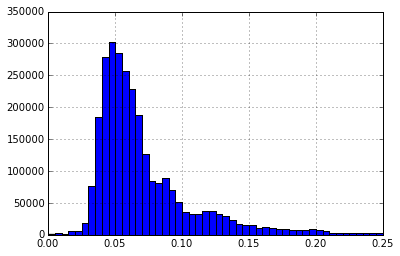

In [34]:
cap_rate[cap_rate<0.25].hist(bins=50)

In [ ]:
# Is the ratio different once the prices are smoothed, though?

In [7]:
n = sim.get_table('nodes').to_frame()

In [8]:
cap_rate2 = n.residential_rent.multiply(12).divide(n.residential_price)
print cap_rate2.describe()

count    221629.000000
mean          0.078785
std           0.090220
min           0.005904
25%           0.048688
50%           0.063198
75%           0.089930
max           4.606170
Name: residential_rent, dtype: float64


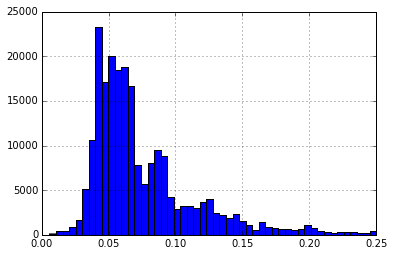

In [10]:
cap_rate2[cap_rate2<0.25].hist(bins=50)

In [12]:
use = 'three'
print (use in ['one','two'])

False


In [8]:
p = orca.get_table("parcels").to_frame(["pct_black", "pct_asian"])

In [9]:
print p[:10]

Empty DataFrame
Columns: []
Index: [95757, 275, 42856, 42872, 42876, 42901, 42902, 57396, 77630, 83476]
